<a href="https://colab.research.google.com/github/Radha54/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [ ]:
# Building the network 
import numpy as np

# Visualization
import matplotlib
import matplotlib as mpl   
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

# imports matplotlib.pyplot (for plotting) and NumPy (for Mathematics and working with arrays) in a single name space
import pylab as pl

# Progress Bar
import tqdm as tqdm

#supresses warnings
import warnings
warnings.filterwarnings("ignore")

# spaCy is compatible with 64-bit CPython 3.6+ and runs on Unix/Linux, macOS/OS etc.
import spacy

# This function can create entire figures at once
import en_core_web_sm

# words that you do not want to use to describe the topic of your content using Stopwords
from nltk.corpus import stopwords  

# tokenizing of Words
from nltk import word_tokenize,sent_tokenize 

# using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem import PorterStemmer,LancasterStemmer  
from nltk.stem.snowball import SnowballStemmer

# lammatizer from WordNet (Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item)
from nltk.stem import WordNetLemmatizer  

!pip install nltk
import nltk 
!python3 -c "import nltk; nltk.download('all')"

# for named entity recognition (NER)
from nltk import ne_chunk

# vectorizers for creating the document-term-matrix (DTM)
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.decomposition import TruncatedSVD

#stop-words
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import linear_kernel
from sklearn.preprocessing import StandardScaler

# Importing libraries for clustering
import matplotlib.cm as cm
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# To identify relatively homogeneous groups of cases based on selected characteristics
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder

/usr/local/lib/python3.7/dist-packages/yaml/constructor.py:126: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  if not isinstance(key, collections.Hashable):
/usr/local/lib/python3.7/dist-packages/dask/array/numpy_compat.py:21: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.divide(0.4, 1, casting="unsafe", dtype=np.float),
/usr/local/lib/python3.7/dist-packages/scipy/io/matlab/mio5.py:98: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any beha

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
sklearn.__version__

'1.0.2'

In [ ]:
spacy.__version__

'2.2.4'

In [ ]:
matplotlib.__version__

'3.2.2'

In [ ]:
sns.__version__

'0.11.2'

In [ ]:
!python -m spacy download en_core_web_lg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 827.9 MB 596 kB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-py3-none-any.whl size=829180942 sha256=c4a8b8da6fc4fd5179ed4534dcc1db916ca9fed3243f0f1e26688aef713af2be
  Stored in directory: /tmp/pip-ephem-wheel-cache-205fxv_0/wheels/11/95/ba/2c36cc368c0bd339b44a791c2c1881a1fb714b78c29a4cb8f5
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


IMPORTING GOOGLE DRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


READING OF DATA

In [ ]:
netflix = pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING - CAPSTONE  PROJECT/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv').drop(['show_id','date_added','release_year','duration'], axis=1)
netflix_df = netflix.copy()
netflix_df.head()

,type,title,director,cast,country,rating,listed_in,description
0,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,TV-MA,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,R,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,PG-13,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,PG-13,Dramas,A brilliant group of students become card-coun...


In [ ]:
# Unique values in diiferent columns
netflix_df.nunique()

type              2
title          7787
director       4049
cast           6831
country         681
rating           14
listed_in       492
description    7769
dtype: int64

<B> OBSERVATION : </B>
Unique values in different columns

In [ ]:
netflix_df.describe()

,type,title,director,cast,country,rating,listed_in,description
count,7787,7787,5398,7069,7280,7780,7787,7787
unique,2,7787,4049,6831,681,14,492,7769
top,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,TV-MA,Documentaries,Multiple women report their husbands as missin...
freq,5377,1,18,18,2555,2863,334,3


In [ ]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   type         7787 non-null   object
 1   title        7787 non-null   object
 2   director     5398 non-null   object
 3   cast         7069 non-null   object
 4   country      7280 non-null   object
 5   rating       7780 non-null   object
 6   listed_in    7787 non-null   object
 7   description  7787 non-null   object
dtypes: object(8)
memory usage: 486.8+ KB


<B> OBSERVATION : </B>

Total entries - 7787

Data Type - Object

Memory Usage - 486.8+ KB

In [ ]:
# Let's see all columns in our data at once 
netflix_df.columns

Index(['type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in',
       'description'],
      dtype='object')

<B> <h2> TRYING TO APPLY 
NATURAL LANGUAGE PROCESSING (NLP MODEL) </h2> </B>

<U> Steps to apply NLP Model: </U>

(A) First convert all plot descriptions to word vectors. 

(B) Finding the similarity between all word vectors will be calculated using cosine similarity.

(C) In last, Extract the 5 movies or TV shows with the most similar plot description to a given movie or TV show.

In [ ]:
!pip install matplotlib-venn
import en_core_web_lg
nlp = en_core_web_lg.load()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Load the large model to get the vectors
!nlp = spacy.load('en_core_web_lg')

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `nlp = spacy.load('en_core_web_lg')'


In [ ]:
# Create word vectors for all movie and TV show descriptions
with nlp.disable_pipes():
    vectors = np.array([nlp(film.description).vector for idx, film in netflix_df.iterrows()])

In [ ]:
# Function to analyze, similar two word vectors are
def cosine_similarity(a, b):
    return np.dot(a, b)/np.sqrt(a.dot(a)*b.dot(b))

In [ ]:
# Calculate the mean for all word vectors
vec_mean = vectors.mean(axis=0)
vec_mean

array([ 4.03124141e-03,  1.17307417e-01, -7.50458539e-02,  1.19669717e-02,
        9.25590843e-02, -2.52444912e-02,  1.72934483e-03, -7.21083581e-02,
        9.74499912e-04,  2.15904045e+00, -1.75573751e-01,  1.27006220e-02,
       -7.59606436e-03, -4.60579619e-02, -7.93438256e-02, -4.34495173e-02,
       -3.00714392e-02,  8.23463619e-01, -9.15560424e-02, -2.97614317e-02,
       -2.35819514e-03, -8.67692381e-02, -6.77456707e-02, -1.82104297e-02,
        6.08783290e-02,  2.23173909e-02, -1.47627527e-02,  1.38600841e-02,
        6.46199938e-03,  1.18008372e-03, -2.11224537e-02,  5.13778739e-02,
       -8.37515444e-02,  5.26668355e-02,  1.32423297e-01, -8.70363265e-02,
        2.69512236e-02, -1.14585822e-02, -1.50500517e-02, -5.81504628e-02,
        4.08566929e-02,  3.83196957e-02,  4.70214896e-02, -9.67595056e-02,
        2.49755308e-02,  1.34147368e-02, -8.14710334e-02,  9.60550178e-03,
        2.50389669e-02, -8.03746004e-03, -2.82796770e-02,  2.44876128e-02,
       -4.25861180e-02, -

In [ ]:
# Subtract the mean from the vectors
centered = vectors - vec_mean
centered

array([[ 9.9758007e-02, -6.0370348e-02, -1.4029928e-02, ...,
        -2.7603861e-02, -1.0464361e-01,  1.0539405e-04],
       [ 4.2904321e-02, -3.4929231e-02, -2.1787390e-02, ...,
         2.6167423e-02, -9.6903399e-02, -4.8770163e-02],
       [ 3.3106171e-02, -4.0788598e-02,  5.6375012e-02, ...,
         8.9276060e-02, -4.6555288e-03, -1.2892699e-01],
       ...,
       [ 8.7871581e-02,  3.6191009e-02, -3.8628422e-02, ...,
         3.1897398e-03, -1.0113302e-01,  9.7010881e-02],
       [-7.6635428e-02, -6.6344745e-02,  8.1281818e-02, ...,
        -8.8133447e-02,  5.7262972e-02,  6.1906826e-02],
       [ 1.8327869e-01,  9.7456947e-03,  3.9330404e-02, ...,
         1.9025382e-01,  6.6480845e-02, -2.1103997e-02]], dtype=float32)

In [ ]:
# Function to get the indices of the five most similar descriptions
def get_similar_description_indices(description_vec):
    
    # Calculate similarities between given description and other descriptions in the dataset
    sims = np.array([cosine_similarity(description_vec - vec_mean, vec) for vec in centered])
    print(f'The Similarity in Dataset is : {sims}')

    # Get the indices of the five most similar descriptions
    most_similar_index = np.argsort(sims)[-6:-1]
    print(f'Indics of 5 Most similar description : {most_similar_index}')
    
    return most_similar_index

In [ ]:
# Create array of lists containing indices of five most similar descriptions
similar_indices = np.array([get_similar_description_indices(vec) for vec in vectors])
similar_indices

Streaming output truncated to the last 5000 lines.
 -0.0678829 ]
Indics of 5 Most similar description : [1132  970 5780 7071 6291]
The Similarity in Dataset is : [ 0.09975916  0.10820813 -0.01540765 ... -0.01699846  0.07826563
 -0.22296117]
Indics of 5 Most similar description : [4362  570 6341 6023 3662]
The Similarity in Dataset is : [ 0.09839563  0.04850275  0.01186292 ... -0.07783197 -0.08911154
 -0.06542172]
Indics of 5 Most similar description : [3333 5123 1659 7459 6799]
The Similarity in Dataset is : [ 0.15906082  0.01253636  0.02367935 ...  0.27254203 -0.01698415
  0.23446772]
Indics of 5 Most similar description : [2292 4378 5855 5144 2216]
The Similarity in Dataset is : [-0.26578403 -0.08377507  0.21927457 ... -0.13935433 -0.02746601
  0.06798165]
Indics of 5 Most similar description : [2401 7483 5778 7441 2094]
The Similarity in Dataset is : [ 0.18074143  0.27427748 -0.04218676 ... -0.05819907 -0.0218951
 -0.2058136 ]
Indics of 5 Most similar description : [7196 6623 6874 5

array([[5141, 7226, 6608, 3704, 7394],
       [4752, 7580, 3031, 7390,  862],
       [6433, 6204, 3106, 3127,  962],
       ...,
       [6136, 5703, 5227, 1989, 6388],
       [4388, 6418, 5622, 4387, 5872],
       [5717, 7034, 5308, 4625, 5585]])

<B> <h2> TESTING OF NLP MODEL </h2> </B>

For Testing of NLP Model, we looks towards the most Similar Movie/TV Shows

In [ ]:
test_index = netflix.index[netflix.title =="The Blacklist"][0]
print("Chosen Movie/TV Show")
print(netflix_df.title[test_index] + ': ' + netflix_df.description[test_index] + '\n')
print("Top Recommendations")
print(netflix_df.title[similar_indices[test_index][4]] + ': ' + netflix_df.description[similar_indices[test_index][4]] + '\n')
print(netflix_df.title[similar_indices[test_index][3]] + ': ' + netflix_df.description[similar_indices[test_index][3]] + '\n')
print(netflix_df.title[similar_indices[test_index][2]] + ': ' + netflix_df.description[similar_indices[test_index][2]] + '\n')
print(netflix_df.title[similar_indices[test_index][1]] + ': ' + netflix_df.description[similar_indices[test_index][1]] + '\n')
print(netflix_df.title[similar_indices[test_index][0]] + ': ' + netflix_df.description[similar_indices[test_index][0]] + '\n')

Chosen Movie/TV Show
The Blacklist: After turning himself in, a brilliant fugitive offers to help the FBI bag other baddies, but only if rookie profiler Elizabeth Keen is his partner.

Top Recommendations
Catch Me If You Can: An FBI agent makes it his mission to put cunning con man Frank Abagnale Jr. behind bars. But Frank not only eludes capture, he revels in the pursuit.

Beauty and the Bestie: Finding himself in a desperate situation, undercover agent Emman asks his former best friend, Erika, to join him on a dangerous mission.

War: When his partner is killed and all clues point to a notorious assassin, FBI agent Jack Crawford sets out for revenge in this taut action-thriller.

Silver Spoon: Forced to become an apprentice cop, cocky playboy Igor finds he's got a knack for police work. But his job soon takes him down a dark personal path.

MI-5: When a terrorist escapes custody, MI-5 director Harry Pearce becomes the scapegoat. But the wily veteran still has some spycraft tricks up 

<B> <h2> K-MEANS CLUSTERING MODEL : </h2> </B> Data Cleaning task on dataset & feature reduction

The k-means clustering method is an unsupervised machine learning technique used to identify clusters of data objects in a dataset. It segregates the unlabeled data into various groups, called clusters, based on having similar features, common patterns.

In [ ]:
# Fill missing country entries with United States
netflix_df.fillna('Other', inplace=True)

# Change director, cast, country, and listed_in columns from type str to lists
netflix_df.director = netflix_df.director.str.split(', ').tolist()
netflix_df.cast = netflix_df.cast.str.split(', ').tolist()
netflix_df.country = netflix_df.country.str.split(', ').tolist()
netflix_df.listed_in = netflix_df.listed_in.str.split(', ').tolist()

In [ ]:
# Array of all unique directors, cast members, countries, ratings, and genres
all_directors = netflix_df['director'].explode().unique()
all_cast = netflix_df['cast'].explode().unique()
all_countries = netflix_df['country'].explode().unique()
all_ratings = netflix_df['rating'].unique()
all_genres = netflix_df['listed_in'].explode().unique()
print(f' Length of Director : {len(all_directors)}')
print(f' Length of Cast (Actor/Actress) : {len(all_cast)}')
print(f' Length of Countries : {len(all_countries)}')
print(f' Length of Rating : {len(all_ratings)}')
print(f' Length of Genres : {len(all_genres)}')

 Length of Director : 4479
 Length of Cast (Actor/Actress) : 32882
 Length of Countries : 122
 Length of Rating : 15
 Length of Genres : 42


<B> OBSERVATION : </B>

I will reduce the number of features by only taking the primary director, lead actor/actress, and primary country for each movie or TV show. 

We will count encode each of these features by replacing each categorical value with the number of times it appears in the dataset.

In [ ]:
all_titles = netflix_df['title'].unique().tolist()
print(f'Titles are : {all_titles}')
all_titles.sort()

Titles are : ['3%', '7:19', '23:59', '9', '21', '46', '122', '187', '706', '1920', '1922', '1983', '1994', '2,215', '3022', 'Oct-01', 'Feb-09', '22-Jul', '15-Aug', "'89", '\u200b\u200bKuch Bheege Alfaaz', '\u200bGoli Soda 2', '\u200bMaj Rati \u200b\u200bKeteki', '\u200bMayurakshi', '\u200bSAINT SEIYA: Knights of the Zodiac', '(T)ERROR', '(Un)Well', '#Alive', '#AnneFrank - Parallel Stories', '#blackAF', '#cats_the_mewvie', '#FriendButMarried', '#FriendButMarried 2', '#realityhigh', '#Roxy', '#Rucker50', '#Selfie', '#Selfie 69', 'แผนร้ายนายเจ้าเล่ห์', '¡Ay, mi madre!', 'Çarsi Pazar', 'Ég man þig', 'Çok Filim Hareketler Bunlar', 'Òlòtūré', 'Æon Flux', 'Şubat', '1 Chance 2 Dance', '1 Mile to You', '10 Days in Sun City', '10 jours en or', '10,000 B.C.', '100 Days My Prince', '100 Days Of Solitude', '100 Humans', '100 Meters', '100 Things to do Before High School', "100 Years: One Woman's Fight for Justice", '100% Halal', '100% Hotter', '1000 Rupee Note', '12 ROUND GUN', '12 Years Promise', 

<B> OBSERVATION : </B> 
I will use <B> one-hot encoding </B> to encode ratings and genres (listed_in) since there are only 15 ratings and 42 genres.

It creates new columns indicating the presence (1) or absence (0) of each possible value in the data. Since a movie or TV show can belong to more than one genre, I will use a Multi Label Binarizer for rating.

<I> Binarizer() is a method which belongs to preprocessing module. It plays a key role in the discretization of continuous feature values. </I>

In [ ]:
# Retain primary director, lead actor/actress, and primary country
for inx in range(len(netflix_df)):
    netflix_df['director'][inx] = netflix_df['director'][inx][0]
    netflix_df['cast'][inx] = netflix_df['cast'][inx][0]
    netflix_df['country'][inx] = netflix_df['country'][inx][0]
    inx += 1

In [ ]:
feature_reduced_df = netflix_df.copy()
feature_reduced_df.head()

,type,title,director,cast,country,rating,listed_in,description
0,TV Show,3%,Other,João Miguel,Brazil,TV-MA,"[International TV Shows, TV Dramas, TV Sci-Fi ...",In a future where the elite inhabit an island ...
1,Movie,7:19,Jorge Michel Grau,Demián Bichir,Mexico,TV-MA,"[Dramas, International Movies]",After a devastating earthquake hits Mexico Cit...
2,Movie,23:59,Gilbert Chan,Tedd Chan,Singapore,R,"[Horror Movies, International Movies]","When an army recruit is found dead, his fellow..."
3,Movie,9,Shane Acker,Elijah Wood,United States,PG-13,"[Action & Adventure, Independent Movies, Sci-F...","In a postapocalyptic world, rag-doll robots hi..."
4,Movie,21,Robert Luketic,Jim Sturgess,United States,PG-13,[Dramas],A brilliant group of students become card-coun...


<B> MULTILABELBINARIZER </B> allows you to encode multiple labels per instance. To translate the resulting array, you could build a DataFrame with this array and the encoded classes.

<B> ONE HOT ENCODER </B> creates a binary column for each category and returns a sparse matrix or dense array (depending on the sparse parameter) By default, the encoder derives the categories based on the unique values in each feature.

In [ ]:
# Create the MultiLabelBinarizer 
mlb = MultiLabelBinarizer()

# Encode each genre and join to dataframe
mlb_df = feature_reduced_df.join(pd.DataFrame(mlb.fit_transform(feature_reduced_df.pop('listed_in')),
                                              columns=mlb.classes_,
                                              index=feature_reduced_df.index))

In [ ]:
# Apply one-hot encoder to rating column
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
print(f'ONE-HOT ENCODER : {OH_encoder}')
OH_rating = pd.DataFrame(OH_encoder.fit_transform(mlb_df[['rating']]), columns=all_ratings)
print(f'Rating Column of ONE-HOT ENCODER : {OH_rating}')

# One-hot encoding removed index; put it back
OH_rating.index = mlb_df.index
print(f'Index of rating Column of ONE-HOT ENCODER : {OH_rating.index}')

# Add one-hot encoded columns to data frame
mlb_df = mlb_df.join(OH_rating)
print(f'Data frame of encoded Column of ONE-HOT ENCODER : {mlb_df}')

ONE-HOT ENCODER : OneHotEncoder(handle_unknown='ignore', sparse=False)
Rating Column of ONE-HOT ENCODER :       TV-MA    R  PG-13  TV-14  TV-PG   NR  TV-G  TV-Y  Other  TV-Y7   PG  \
0       0.0  0.0    0.0    0.0    0.0  0.0   0.0   0.0    0.0    1.0  0.0   
1       0.0  0.0    0.0    0.0    0.0  0.0   0.0   0.0    0.0    1.0  0.0   
2       0.0  0.0    0.0    0.0    0.0  0.0   1.0   0.0    0.0    0.0  0.0   
3       0.0  0.0    0.0    0.0    0.0  1.0   0.0   0.0    0.0    0.0  0.0   
4       0.0  0.0    0.0    0.0    0.0  1.0   0.0   0.0    0.0    0.0  0.0   
...     ...  ...    ...    ...    ...  ...   ...   ...    ...    ...  ...   
7782    0.0  0.0    0.0    0.0    0.0  0.0   0.0   0.0    0.0    1.0  0.0   
7783    0.0  0.0    0.0    0.0    0.0  0.0   0.0   1.0    0.0    0.0  0.0   
7784    0.0  0.0    0.0    0.0    0.0  0.0   0.0   0.0    0.0    1.0  0.0   
7785    0.0  0.0    0.0    0.0    0.0  0.0   0.0   0.0    0.0    0.0  1.0   
7786    0.0  0.0    0.0    0.0    0.0  0.0   0.

<B> <h2> CATEGORY ENCODER </h2> </B> All of the encoders are fully compatible sklearn transformers, so they can be used in pipelines or in your existing scripts. Supported input formats include numpy arrays and pandas dataframes. If the cols parameter isn't passed, all columns with object or pandas categorical data type will be encoded.

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 680 kB/s 


In [ ]:
import category_encoders as ce

# Create the count encoder
count_enc = ce.CountEncoder()

# Count encode director, cast, and country columns
count_encoded = count_enc.fit_transform(mlb_df[['director','cast','country']])
print(f'Counting, Director, Cast and Country is : {count_encoded}')

# Rename the columns with the _count suffix, and join to dataframe
netflix_encoded_df = mlb_df.join(count_encoded.add_suffix("_count"))
print(f'Rename and join of Coulmns is : {netflix_encoded_df}')

Counting, Director, Cast and Country is :       director  cast  country
0         2389     1       79
1            1     2      123
2            1     1       28
3            1     3     2882
4            4     2     2882
...        ...   ...      ...
7782         1     1       16
7783         1     3      956
7784      2389     1      507
7785      2389     1      108
7786         2   718      576

[7787 rows x 3 columns]
Rename and join of Coulmns is :          type                                    title           director  \
0     TV Show                                       3%              Other   
1       Movie                                     7:19  Jorge Michel Grau   
2       Movie                                    23:59       Gilbert Chan   
3       Movie                                        9        Shane Acker   
4       Movie                                       21     Robert Luketic   
...       ...                                      ...                ...   
77

In [ ]:
netflix_encoded_df = netflix_encoded_df.drop(['type','title','director','cast','country','rating','description'], axis=1)
netflix_encoded_df.head()

,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,...,Other,TV-Y7,PG,G,NC-17,TV-Y7-FV,UR,director_count,cast_count,country_count
0,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2389,1,79
1,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,2,123
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,28
3,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3,2882
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2,2882


<B> <h2> CREATE CLUSTER (K-MEANS) </h2> </B>
<U> Cluster analysis or clustering </U> is an unsupervised machine learning algorithm that groups unlabeled datasets. It aims to form clusters or groups using the data points in a dataset in such a way that there is high intra-cluster similarity and low inter-cluster similarity.

Types of Clustering :

(a) Centroid-based Clustering.

(b) Density-based Clustering.

(c) Distribution-based Clustering.

(d) Hierarchical Clustering.

In [ ]:
# Create K-Means Model
modelkmeans = KMeans(n_clusters=500, init='k-means++', n_init=10).fit(netflix_encoded_df)
print(f'K-Means Model is :{modelkmeans}')

# Form cluster predictions using K-Means Model
predictions = modelkmeans.predict(netflix_encoded_df)
print(f'Cluster predictions usin K-Means Model is : {predictions}')

# Convert cluster predictions to data frame
predictions_df = pd.DataFrame(predictions, columns=['cluster'])
print(f'Converting Cluster predictions to Data Frame is : {predictions_df}')

# Attach cluster predictions to original data frame
netflix_pred = netflix.copy()
netflix_pred.insert(len(netflix.columns), column = 'cluster', value = predictions_df.cluster)

K-Means Model is :KMeans(n_clusters=500)
Cluster predictions usin K-Means Model is : [461  46 425 ... 222 494 227]
Converting Cluster predictions to Data Frame is :       cluster
0         461
1          46
2         425
3         368
4         257
...       ...
7782      103
7783      435
7784      222
7785      494
7786      227

[7787 rows x 1 columns]


In [ ]:
netflix_pred.head()

,type,title,director,cast,country,rating,listed_in,description,cluster
0,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,461
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,TV-MA,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,46
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,R,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",425
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,PG-13,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",368
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,PG-13,Dramas,A brilliant group of students become card-coun...,257


<B> <h2>TEST OF K-MEANS CLUSTER MODEL :</h2> </B> I will test the k-means clustering model using one of my favourite TV shows i.e. Unsolved.



In [ ]:
# Get cluster number from given movie or TV show
cluster_num = netflix_pred[netflix_pred.title=='Unsolved'].cluster.item()
print(f'The cluster number from given movie or TV show is : {cluster_num}')

# View cluster the movie or TV show belongs to
netflix[netflix_pred.cluster == cluster_num]

The cluster number from given movie or TV show is : 395


,type,title,director,cast,country,rating,listed_in,description
63,TV Show,13 Reasons Why,NaN,"Dylan Minnette, Katherine Langford, Kate Walsh...",United States,TV-MA,"Crime TV Shows, TV Dramas, TV Mysteries","After a teenage girl's perplexing suicide, a c..."
64,TV Show,13 Reasons Why: Beyond the Reasons,NaN,"Dylan Minnette, Katherine Langford, Kate Walsh...",United States,TV-MA,"Crime TV Shows, Docuseries","Cast members, writers, producers and mental he..."
543,TV Show,Another Life,NaN,"Katee Sackhoff, Justin Chatwin, Samuel Anderso...",United States,TV-MA,"TV Action & Adventure, TV Dramas, TV Mysteries","After a massive alien artifact lands on Earth,..."
1308,TV Show,Chelsea Does,NaN,Chelsea Handler,United States,TV-MA,"Docuseries, Science & Nature TV","In a provocative documentary series, comedian ..."
1439,TV Show,Coach Snoop,NaN,Snoop Dogg,United States,TV-MA,"Docuseries, Reality TV","Fueled by his own rough upbringing, Snoop Dogg..."
2457,TV Show,Godless,NaN,"Jeff Daniels, Michelle Dockery, Jack O'Connell...",United States,TV-MA,TV Dramas,A ruthless outlaw terrorizes the West in searc...
4401,TV Show,Narcos,NaN,"Wagner Moura, Pedro Pascal, Boyd Holbrook, Dam...","United States, Colombia, Mexico",TV-MA,"Crime TV Shows, TV Action & Adventure, TV Dramas",The true story of Colombia's infamously violen...
5923,TV Show,Surviving R. Kelly,NaN,R. Kelly,United States,TV-MA,"Crime TV Shows, Docuseries",In this documentary series on the tangled hist...
5924,TV Show,Surviving R. Kelly Part II: The Reckoning,NaN,R. Kelly,United States,TV-MA,"Crime TV Shows, Docuseries",As more women come forward with harrowing accu...
6222,TV Show,The Circle,NaN,Michelle Buteau,"United States, United Kingdom",TV-MA,Reality TV,Status and strategy collide in this social exp...


<B> <h2> FLASK APP : </h2></B>
Creating a Flask app that will allow users to input a movie or TV show and will provide recommendations based on the director, lead actor/actress, genre, and country it was produced in. 

Prior to creating the app, I will clean the data and reformat it.



In [ ]:
# Retain top 3 actors/actresses of each film
netflix_cast3 = netflix.copy()
netflix_cast3.fillna('N/A', inplace=True)
netflix_cast3.cast = netflix_cast3.cast.str.split(', ').tolist()

for x in range(len(netflix_cast3)):
    netflix_cast3['cast'][x] = netflix_cast3['cast'][x][:3]
    x += 1
    
netflix_cast3['cast'] = netflix_cast3['cast'].agg(lambda x: ', '.join(map(str, x)))

In [ ]:
# Dropping unnecessary columns
drop_netflix = netflix_cast3.drop(['type','director','country','rating'], axis=1)

# Rename remaining columns
flix_df = drop_netflix.rename(columns={'title':'Title','listed_in':'Genre','cast':'Cast','description':'Description', 
                                       'cluster':'Group'})
flix_df

,Title,Cast,Genre,Description
0,3%,"João Miguel, Bianca Comparato, Michel Gomes","International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano","Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,23:59,"Tedd Chan, Stella Chung, Henley Hii","Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,9,"Elijah Wood, John C. Reilly, Jennifer Connelly","Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth",Dramas,A brilliant group of students become card-coun...
...,...,...,...,...
7782,Zozo,"Imad Creidi, Antoinette Turk, Elias Gergi","Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana","Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,Zulu Man in Japan,Nasty C,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,Zumbo's Just Desserts,"Adriano Zumbo, Rachel Khoo","International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [ ]:
# It brings along the plotly graphing library.
!pip install dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.8 MB 642 kB/s 
     |████████████████████████████████| 357 kB 34.8 MB/s 


In [ ]:
#This library makes it easy to develop Plotly Dash apps interactively from within Jupyter environments 
!pip install jupyter-dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=aff4fd4f675b304f17e760b45f1d24650cef2212f0b47714615637486e37a9e2
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [ ]:
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
from dash import dash_table
from jupyter_dash import JupyterDash

In [ ]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = JupyterDash(__name__, external_stylesheets=external_stylesheets)

# Create server variable with Flask server object for use with gunicorn
server = app.server

app.layout = html.Div(style={'backgroundColor': 'white'}, children = [
    html.H1("NetflixRecommender", style={'text-align': 'center', 
                                      'font-family':'trebuchet ms',
                                      'font-size':'60px',
                                      'color': 'rgb(229,9,20)',
                                      'backgroundColor': 'black',
                                      'padding':'1%',
                                      'box-shadow': '2px 5px 5px 1px rgba(255, 101, 131,0.5)'}), 
    html.H2("Favourite Movie/TV Show:", style={'text-align': 'left', 
                                               'font-family':'trebuchet ms',
                                               'font-size':'20px',
                                               'color': 'black',
                                               'padding':'1%'}),
    dcc.Dropdown(id="select_film",
                 options=[{"label": title, "value": title} for title in all_titles],
                 multi=False,
                 value="Breaking Bad",
                 style={'width': "50%", 
                        'font-size':'14px', 
                        'font-family':'trebuchet ms', 
                        'padding-left':'1%'}
                 ),
    html.Br(),
    html.Br(),
    html.H2("Recommendations", style={'text-align': 'center', 
                                       'font-family':'trebuchet ms',
                                       'font-size':'24px',
                                       'color': 'white',
                                       'backgroundColor': 'rgb(229,9,20)',
                                       'padding':'1%',
                                       'box-shadow': '2px 5px 5px 1px grey'}),
    html.Div(id='dd-output-container'),  
])
@app.callback(
    dash.dependencies.Output('dd-output-container','children'),
    [dash.dependencies.Input('select_film','value')])

def update_output(value):
    return  dash_table.DataTable(
        id='table',
        columns=[{"name": i, "id": i} for i in flix_df.columns],
        data=flix_df[netflix_pred.cluster == netflix_pred[netflix_pred.title==value].cluster.item()].to_dict('records'),
        style_header={
                    'textAlign': 'left',
                    'backgroundColor': 'rgb(229,9,20)',
                    'color': 'white',
                    'fontWeight': 'bold',
                    'font-size':'14px',
                    'font-family':'trebuchet ms',
                    'padding':'1%'},
        style_cell={
                    'textAlign': 'left',
                    'backgroundColor': 'white', 
                    'color': 'black',
                    'font-size':'13px',
                    'font-family':'trebuchet ms',
                    'padding':'1%'},
        style_data={
                    'whiteSpace': 'normal',
                    'height': 'auto'},
        style_cell_conditional=[
            {'if': {'column_id': 'Title'},
             'width': '20%'},
            {'if': {'column_id': 'Cast'},
             'width': '20%'},
            {'if': {'column_id': 'Genre'},
             'width': '20%'},
             {'if': {'column_id': 'Description'},
             'width': '20%'},
        ]
    )
# Run dashboard app
app.run_server(debug=True, use_reloader=False)

Dash app running on:


<IPython.core.display.Javascript object>

In [ ]:
Flix_df = pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING - CAPSTONE  PROJECT/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

EDA ON DATA

In [ ]:
Flix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
Flix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
Flix_df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [ ]:
Flix_df.shape

(7787, 12)

In [ ]:
Flix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
Flix_df['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

In [ ]:
Flix_df.isnull().sum()/Flix_df.shape[0]*100

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

In [ ]:
Flix_df['rating'].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [ ]:
Flix_df['country'].value_counts()

United States                                                   2555
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

<B> OBSERVATION : </B>

RATING & COUNTRY - As rating column has 0.08% null values , so replacing nulls with mose frequent TV-MA rating and doing same thing with country column

CAST - cast column has too many different values and more than 9% are missing, so there is no need to keep it but we are keeping it to perform EDA

DATE - there are few missing values for date column. so, lets drop missing value rows.

DIRECTOR - Director column has more then 30% null values so dropping that column

So, dropping the coulmns now.

In [ ]:
Flix_df['rating'].replace(np.nan, 'TV-MA',inplace  = True)
Flix_df['country'].replace(np.nan, 'United States',inplace  = True)
Flix_df['cast'].replace(np.nan, 'missing info',inplace  = True)
Flix_df= Flix_df.drop(columns='director',axis=1)

In [ ]:
flix_df.head()

,Title,Cast,Genre,Description
0,3%,"João Miguel, Bianca Comparato, Michel Gomes","International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano","Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,23:59,"Tedd Chan, Stella Chung, Henley Hii","Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,9,"Elijah Wood, John C. Reilly, Jennifer Connelly","Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth",Dramas,A brilliant group of students become card-coun...


In [ ]:
Flix_df = Flix_df[Flix_df['date_added'].notna()]
Flix_df

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,Nasty C,United States,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [ ]:
Flix_df.isnull().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
# new features added date to year, month, and day using date time format.
Flix_df["date_added"] = pd.to_datetime(Flix_df['date_added'])
Flix_df['year_added'] = Flix_df['date_added'].dt.year
Flix_df['month_added'] = Flix_df['date_added'].dt.month

ANALYSING TYPE OF CONTENT AVAILABLE ON NETFLIX

In [ ]:
# ploting for pie chart on type feature
# import plotly.express as px
x = Flix_df['type'].value_counts().reset_index()
colors=['Blue','Green']
fig = px.pie(x,title='NETFLIX CONTENT',values='type',names='index',color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20,
              marker=dict(colors=colors, line=dict(color='#000000', width=2)))

<B> OBSERVATION :</B>

TV Show = 30.9% & Movie = 69.1%

In [ ]:
country = Flix_df['country'].value_counts().reset_index()
country = country[country['country'] /  country['country'].sum() > 0.01]

fig = px.pie(country, values='country', names='index',color_discrete_sequence=px.colors.sequential.Plasma_r)
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'darkred', width = 2)))
fig.show()

<B> OBSERVATION :</B>

Unites States having highest Content on NETFLIX and 2nd highest in India.

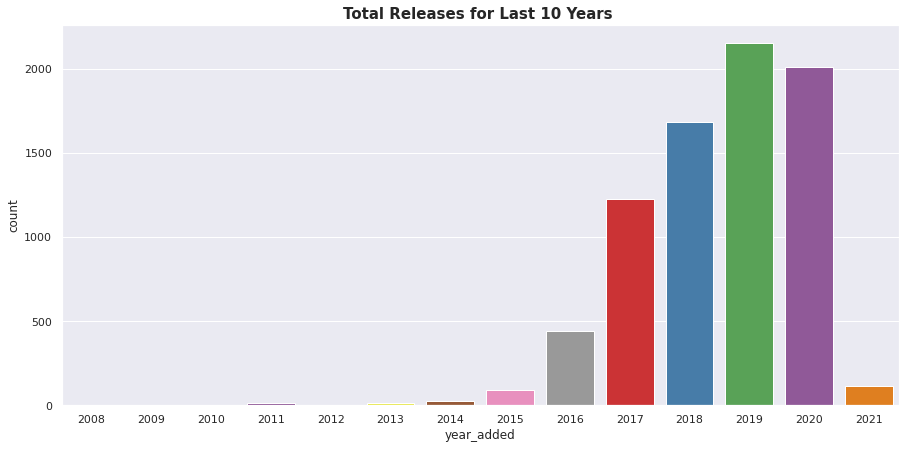

In [ ]:
# Total release for last 10 years
sns.set(rc={'figure.figsize':(15,7)})
sns.countplot(x='year_added',data=Flix_df,palette="Set1")

plt.title('Total Releases for Last 10 Years ',size='15',fontweight="bold")    
plt.show()

<B> OBSERVATION : </B>
Higest Movies released in 2019.

The number of release have significantly increased after 2015 and have dropped in 2021 becase of Covid-19.

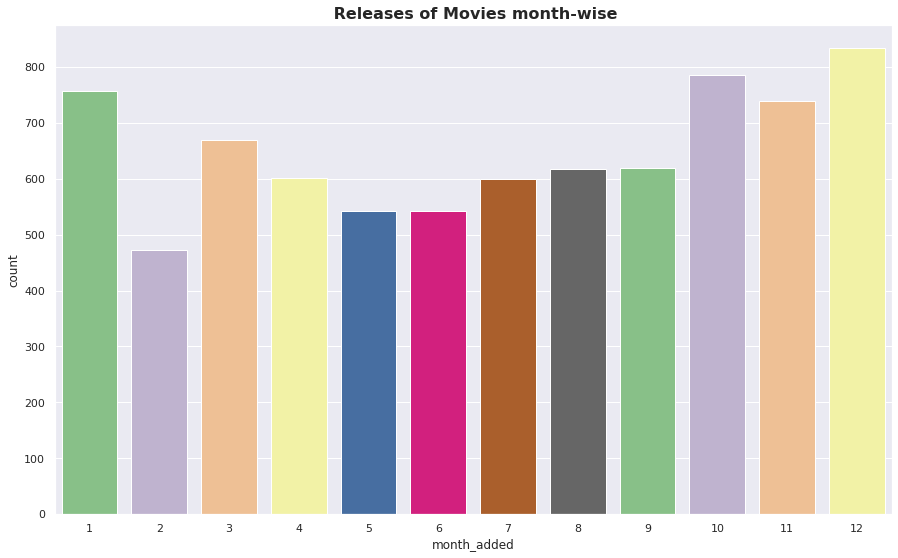

In [ ]:
# Release of movies month-wise
sns.set(rc={'figure.figsize':(15,9)})
sns.countplot(x='month_added',data=Flix_df,palette="Accent")

plt.title(' Releases of Movies month-wise',size='16',fontweight="bold")    
plt.show()

<B> OBSERVATION :</B> 

More of the Movie released in 4 months i.e. October, November, December and January.

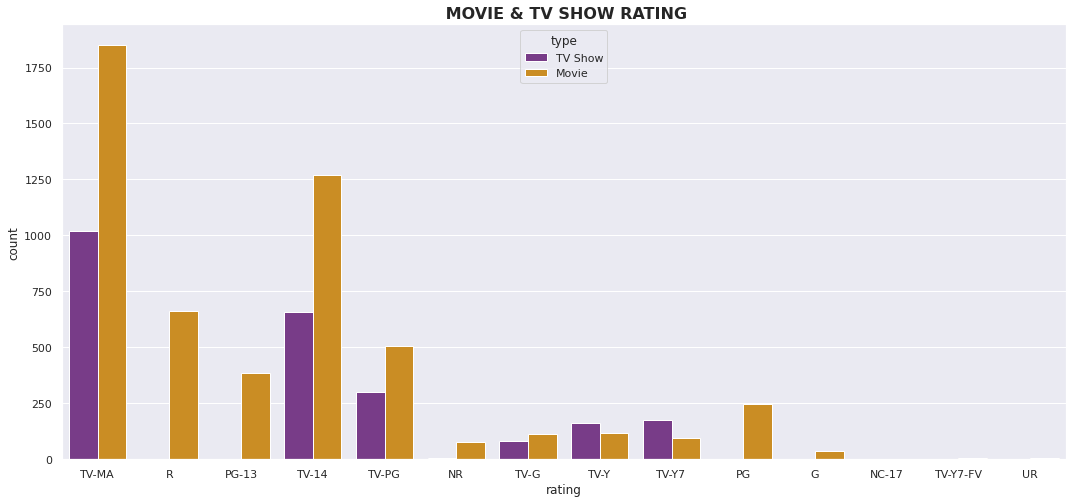

In [ ]:
# Rating
plt.figure(figsize=(18,8))
sns.countplot(x='rating',hue='type',data=Flix_df,palette="CMRmap")
plt.title(' MOVIE & TV SHOW RATING',size='16',fontweight="bold")
plt.show()

<B> OBSERVATION :</B>
Highest rating in TV-MA and TV-14.

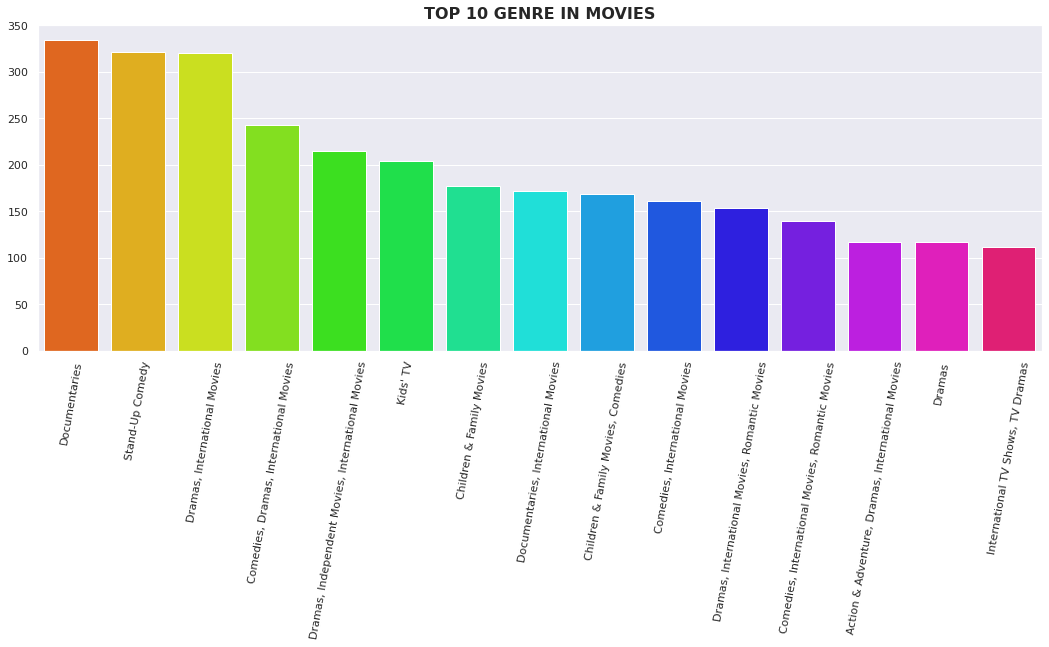

In [ ]:
# Top 10 Genre in movies
plt.figure(figsize=(18,6))
sns.barplot(x = Flix_df["listed_in"].value_counts().head(15).index,
            y = Flix_df["listed_in"].value_counts().head(15).values,palette="hsv")
plt.xticks(rotation=80)
plt.title("TOP 10 GENRE IN MOVIES",size='16',fontweight="bold")
plt.show()

<B> OBSERVATION : </B> Documentaries take the first place, followed by Stand-up Comedy and Dramas,International Movies..

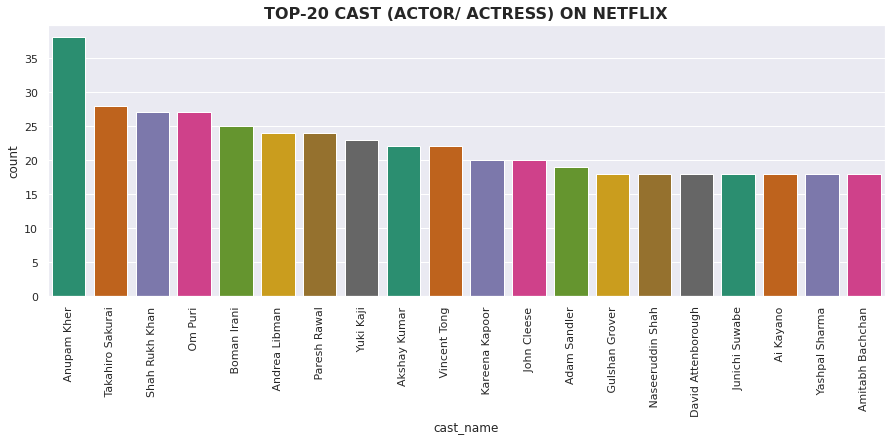

In [ ]:
# Top 20 actors netflix
Flix_df['cast_name'] = Flix_df['cast'].apply(lambda x :  x.split(',')) 
cast_count = []
for i in Flix_df['cast_name']: cast_count += i
cast_dict = dict((i, cast_count.count(i)) for i in cast_count)
df_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'cast_name', 0 : 'count'}).iloc[1:21]
plt.figure(figsize=(15,5))
sns.barplot(x='cast_name',y='count',data=df_cast_count,palette="Dark2")
plt.title("TOP-20 CAST (ACTOR/ ACTRESS) ON NETFLIX",size='16',fontweight="bold")
plt.xticks(rotation=90)
plt.show()

<B> OBSERVATION : </B>
The top actor on Netflix Movies is Anupam Kher.



In [ ]:
Flix_df['duration']=Flix_df['duration'].str.replace('Season','')
Flix_df['duration']=Flix_df['duration'].str.replace('s','')
Flix_df['duration']=Flix_df['duration'].str.replace('min','')

Flix_df['duration']=Flix_df['duration'].astype(str).astype(int)
Flix_df['duration']

0         4
1        93
2        78
3        80
4       123
       ... 
7782     99
7783    111
7784     44
7785      1
7786     90
Name: duration, Length: 7777, dtype: int64

The length of Movie is :      show_id   type                                    title  \
1         s2  Movie                                     7:19   
2         s3  Movie                                    23:59   
3         s4  Movie                                        9   
4         s5  Movie                                       21   
6         s7  Movie                                      122   
...      ...    ...                                      ...   
7781   s7782  Movie                                     Zoom   
7782   s7783  Movie                                     Zozo   
7783   s7784  Movie                                   Zubaan   
7784   s7785  Movie                        Zulu Man in Japan   
7786   s7787  Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

                                                   cast  \
1     Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2     Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3     Elijah Wood, John C. Re

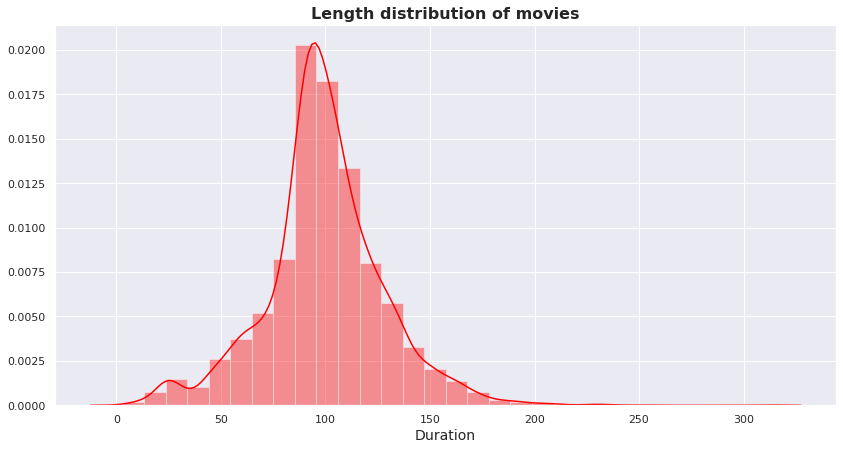

In [ ]:
# Length distribution of movies
movie_df = Flix_df[Flix_df['type']=='Movie']
print(f'The length of Movie is : {movie_df}')

plt.figure(figsize=(14, 7))

sns.distplot(movie_df['duration'], bins=30,color='Red').set(ylabel=None)

plt.title('Length distribution of movies', fontsize=16,fontweight="bold")
plt.xlabel('Duration', fontsize=14)
plt.show()

In [ ]:
# Season-wise distribution of tv shows
tv_df = Flix_df[Flix_df['type']=='TV Show']
tv_df['duration'].value_counts()

tv=tv_df['duration'].value_counts().T.reset_index()

fig = px.pie(tv,values='duration',names='index',color_discrete_sequence=px.colors.sequential.Greens)
fig.update_layout(title="season-wise distribution of tv shows")
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20,
                  marker=dict( line=dict(color = 'Purple', width=2)))

In [ ]:
# Longest TV Show
long_shows = tv_df[tv_df['duration']>9]
long_shows_df = long_shows[['title','duration']]
long_shows_df.sort_values(by=['duration'],ascending=False)

,title,duration
2538,Grey's Anatomy,16
4438,NCIS,15
5912,Supernatural,15
1471,COMEDIANS of the world,13
1537,Criminal Minds,12
7169,Trailer Park Boys,12
1300,Cheers,11
2678,Heartland,11
1577,Dad's Army,10
1597,Danger Mouse: Classic Collection,10


In [ ]:
movie_df.drop(columns=['show_id', 'title', 'cast', 'date_added', 'description', 'cast_name'],axis=1,inplace=True)

tv_df.drop(columns=['show_id', 'title', 'cast', 'date_added',
          'description', 'cast_name'],axis=1,inplace=True)

new_flix_df = Flix_df.drop(columns=['show_id', 'title', 'cast', 'date_added', 'description', 'cast_name'],axis=1)
# movie_df
new_flix_df

,type,country,release_year,rating,duration,listed_in,year_added,month_added
0,TV Show,Brazil,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",2020,8
1,Movie,Mexico,2016,TV-MA,93,"Dramas, International Movies",2016,12
2,Movie,Singapore,2011,R,78,"Horror Movies, International Movies",2018,12
3,Movie,United States,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...",2017,11
4,Movie,United States,2008,PG-13,123,Dramas,2020,1
...,...,...,...,...,...,...,...,...
7782,Movie,"Sweden, Czech Republic, United Kingdom, Denmar...",2005,TV-MA,99,"Dramas, International Movies",2020,10
7783,Movie,India,2015,TV-14,111,"Dramas, International Movies, Music & Musicals",2019,3
7784,Movie,United States,2019,TV-MA,44,"Documentaries, International Movies, Music & M...",2020,9
7785,TV Show,Australia,2019,TV-PG,1,"International TV Shows, Reality TV",2020,10


In [ ]:
#from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_flix_df["type"] = le.fit_transform(new_flix_df["type"])
new_flix_df["country"] = le.fit_transform(new_flix_df["country"])

new_flix_df['rating'] = le.fit_transform(new_flix_df['rating'])
new_flix_df['listed_in'] = le.fit_transform(new_flix_df['listed_in'])

In [ ]:
#combining genre and description column (TEXT CLEANING)
text_df = Flix_df['listed_in'] + Flix_df['description']
text_df

0       International TV Shows, TV Dramas, TV Sci-Fi &...
1       Dramas, International MoviesAfter a devastatin...
2       Horror Movies, International MoviesWhen an arm...
3       Action & Adventure, Independent Movies, Sci-Fi...
4       DramasA brilliant group of students become car...
                              ...                        
7782    Dramas, International MoviesWhen Lebanon's Civ...
7783    Dramas, International Movies, Music & Musicals...
7784    Documentaries, International Movies, Music & M...
7785    International TV Shows, Reality TVDessert wiza...
7786    Documentaries, Music & MusicalsThis documentar...
Length: 7777, dtype: object

In [ ]:
#fuction for cleaning text
def clean_text(text):
    le=WordNetLemmatizer()
    word_tokens=word_tokenize(text)
    tokens=[le.lemmatize(w) for w in word_tokens if w not in STOPWORDS and len(w)>3]
    cleaned_text=" ".join(tokens)
    return cleaned_text

In [ ]:
new_text_df = text_df.apply(clean_text)
new_text_df

0       International Shows Dramas Sci-Fi FantasyIn fu...
1       Dramas International MoviesAfter devastating e...
2       Horror Movies International MoviesWhen army re...
3       Action Adventure Independent Movies Sci-Fi Fan...
4       DramasA brilliant group student become card-co...
                              ...                        
7782    Dramas International MoviesWhen Lebanon Civil ...
7783    Dramas International Movies Music MusicalsA sc...
7784    Documentaries International Movies Music Music...
7785    International Shows Reality TVDessert wizard A...
7786    Documentaries Music MusicalsThis documentary d...
Length: 7777, dtype: object

<B> OBSERVATION : </B> 

1) LSA is generally implemented with Tf idf values everywhere and not with the Count Vectorizer.

2) max_features depends on your computing power and evaluation metric (coherence score is a metric for topic model). Try the value that gives best evaluation metric and doesn't limits processing power.

3) Default values for min_df & max_df worked well.


In [ ]:
vect =TfidfVectorizer(stop_words=STOPWORDS,max_features=1000)
vect_text=vect.fit_transform(new_text_df)
print(vect.get_feature_names())

['000', '10', '1970s', '1980s', 'ability', 'abuse', 'academy', 'accident', 'accidentally', 'account', 'accused', 'across', 'action', 'activist', 'actor', 'actress', 'adult', 'adventure', 'adventurea', 'affair', 'africa', 'african', 'aged', 'agent', 'aging', 'agrees', 'alien', 'along', 'also', 'always', 'ambition', 'ambitious', 'america', 'american', 'amid', 'among', 'ancient', 'angeles', 'animal', 'animated', 'anime', 'another', 'answer', 'anthology', 'anything', 'apart', 'apartment', 'army', 'around', 'arrives', 'art', 'artist', 'aspiring', 'assassin', 'athlete', 'attack', 'attempt', 'audience', 'avenge', 'away', 'baby', 'bachelor', 'back', 'band', 'bank', 'based', 'battle', 'bear', 'beautiful', 'beauty', 'become', 'becomes', 'becoming', 'befriends', 'begin', 'behind', 'belief', 'beloved', 'best', 'better', 'beyond', 'biggest', 'bill', 'biopic', 'birth', 'birthday', 'black', 'body', 'bollywood', 'bond', 'book', 'bos', 'boy', 'boyfriend', 'brave', 'break', 'bride', 'bring', 'brings', '

In [ ]:
idf=vect.idf_
dd=dict(zip(vect.get_feature_names(), idf))
l=sorted(dd, key=(dd).get)
# print(l)
print(l[0],l[-1])
print(dd['international'])
print(dd['bear'])

international bear
1.7552031425318138
6.963322241161702


In [ ]:
new_text_df.head()

0    International Shows Dramas Sci-Fi FantasyIn fu...
1    Dramas International MoviesAfter devastating e...
2    Horror Movies International MoviesWhen army re...
3    Action Adventure Independent Movies Sci-Fi Fan...
4    DramasA brilliant group student become card-co...
dtype: object

For sorting more similar group in a genre we use two methods:
1. Latent Semantic Analysis (LSA)
2. Latent Dirichlet Allocation (LDA)

TOPIC MODELLIG : <B> Latent semantic analysis (LSA) </B> is a technique in natural language processing, in particular distributional semantics, of analyzing relationships between a set of documents and the terms they contain by producing a set of concepts related to the documents and terms. It assumes that words that are close in meaning will occur in similar pieces of text.

In [ ]:
lsa_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=10, random_state=42)

lsa_top=lsa_model.fit_transform(vect_text)
print(lsa_top[0])
print(lsa_top.shape)

[ 0.20293519  0.06241254  0.09476091 -0.08713809 -0.06508088 -0.02441961
 -0.07393697 -0.03987938  0.1216865   0.05689153]
(7777, 10)


In [ ]:
l=lsa_top[0]
print("NETFLIX TOPIC :")
for i,topic in enumerate(l):
  print("NETFLIX Topic ",i," : ",topic*100)

NETFLIX TOPIC :
NETFLIX Topic  0  :  20.293518652143167
NETFLIX Topic  1  :  6.241254183244821
NETFLIX Topic  2  :  9.476090568628704
NETFLIX Topic  3  :  -8.713808823563785
NETFLIX Topic  4  :  -6.508088221508112
NETFLIX Topic  5  :  -2.4419609590770617
NETFLIX Topic  6  :  -7.393697417978791
NETFLIX Topic  7  :  -3.987937729335128
NETFLIX Topic  8  :  12.16864957446164
NETFLIX Topic  9  :  5.689152703245175


In [ ]:
 # LSA Component shape is No_of_topics*no_of_words
print(lsa_model.components_.shape)
print(lsa_model.components_)

(10, 1000)
[[ 0.00656765  0.00545324  0.00756655 ...  0.13097143  0.008755
   0.0057369 ]
 [ 0.00463957 -0.00387344  0.00036291 ... -0.0597857  -0.00522815
   0.00116565]
 [ 0.00358206  0.00043861  0.00152986 ... -0.04092356 -0.00215488
   0.00068989]
 ...
 [ 0.0032807   0.00438    -0.00305445 ...  0.0173375  -0.00310734
   0.00369738]
 [ 0.00831187 -0.00264949 -0.00792638 ... -0.0038689  -0.00092768
  -0.00365867]
 [ 0.00871115 -0.00352474  0.00177444 ...  0.22019193 -0.00048612
  -0.00434304]]


In [ ]:
# TOP 10 TOPICS ON NETFLIX
vocab = vect.get_feature_names()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print(" NETFLIX Genre "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

 NETFLIX Genre 0: 
international shows movies dramas comedies romantic family life independent young 

 NETFLIX Genre 1: 
shows crime british spanish language korean docuseries series reality romantic 

 NETFLIX Genre 2: 
adventure action fi sci kids stand family children world series 

 NETFLIX Genre 3: 
stand special comedy comedian comic talk family take show life 

 NETFLIX Genre 4: 
family children movies shows save friend christmas comedieswhen music kids 

 NETFLIX Genre 5: 
documentaries documentary music world docuseries series moviesthis sports life international 

 NETFLIX Genre 6: 
comedies romantic friend kids love life school best high series 

 NETFLIX Genre 7: 
series kids independent docuseries dramas friend science nature anime world 

 NETFLIX Genre 8: 
horror movies fi sci romantic series reality kids thrillersa docuseries 

 NETFLIX Genre 9: 
life docuseries young woman reality nature love science family romantic 



<B> OBSERVATION : </B> 

Topic modelling did the genre analysis in movies and tv shows.

Each topic identifies genre of movies an tv shows on netflix.

<B> LATENT DIRICHLET ALLOCATION (LDA)</B> is a generative statistical model that allows sets of observations to be explained by unobserved groups that explain why some parts of the data are similar.



In [ ]:
lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=42,max_iter=1) 

# n_components is the number of topics
lda_top=lda_model.fit_transform(vect_text)
print(f'Number of Topics in LDA : {lda_top}')

# (no_of_doc,no_of_topics)
print(f'Shape of LDA : {lda_top.shape}')
print(f'Top of LDA : {lda_top[0]}')

Number of Topics in LDA : [[0.02414418 0.12414676 0.12962484 ... 0.0241459  0.26460777 0.02415474]
 [0.02418973 0.02418266 0.02418226 ... 0.02418327 0.12597931 0.11406725]
 [0.02008699 0.02008696 0.0200872  ... 0.02009301 0.02009755 0.02008358]
 ...
 [0.34956696 0.02249283 0.02251472 ... 0.02248705 0.02248845 0.12838277]
 [0.02606263 0.02605535 0.02605618 ... 0.19229736 0.02605649 0.02606074]
 [0.10691465 0.02268968 0.02269198 ... 0.10492396 0.02268972 0.10497483]]
Shape of LDA : (7777, 10)
Top of LDA : [0.02414418 0.12414676 0.12962484 0.02414177 0.02414211 0.02414732
 0.3367446  0.0241459  0.26460777 0.02415474]


In [ ]:
sum=0
for i in lda_top[0]:
  sum=sum+i
print(sum)
# composition of doc
print("Doc : ")
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

1.0
Doc : 
Topic  0 :  2.4144182378249135 %
Topic  1 :  12.414675939768506 %
Topic  2 :  12.962484438372012 %
Topic  3 :  2.4141769370311152 %
Topic  4 :  2.4142105509647123 %
Topic  5 :  2.4147321526635563 %
Topic  6 :  33.67446039682233 %
Topic  7 :  2.4145900255744124 %
Topic  8 :  26.46077727131408 %
Topic  9 :  2.4154740496643674 %


In [ ]:
print(lda_model.components_[0])

# Shape of LDA Model : (no_of_topics*no_of_words)
print(lda_model.components_.shape)

[ 0.10625601  0.10479982  0.10361033  0.10350776  0.10453338  0.10410135
  7.56898903  4.12268613  5.87343916  0.10295428 13.05413004  0.10676137
 24.08349992  0.10366304  0.13548909  7.97196421  0.10343819 27.42801765
  0.10363819  0.10315921 11.29809628  0.10395165 10.47021949  0.10522956
  0.10393614  0.10387084  0.10811047  0.10386706  0.10338539  0.10677472
  8.8428024   0.12861953  0.10384995  0.10660804  0.10437049  0.10462358
  0.10428227  0.10874718  0.11479801  0.10494562  0.10850982 16.18485759
  0.12737047  0.10464669  0.10363748  0.10451262  0.10361202  0.10386384
 16.14247483  8.93980823  0.10356216 21.91819705  0.10648565  0.10409649
  0.10381545  0.49854172 13.11264414  0.177145    0.14220967  6.02657499
  0.3824541   0.10819039 20.11012026  0.10755296  0.10376464 26.08469636
  6.95702085  0.12535681  0.10524656  0.10479231  1.13007647 13.69662525
  0.10479     0.1052495   0.14048281  9.60729517  0.10391177  0.17040983
 13.00005521  0.10370199  0.10331401  0.10770043  0

In [ ]:
# Important Features of each Topic
vocab = vect.get_feature_names()

for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:5]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
family international dramas movies children 

Topic 1: 
shows rich chance body chef 

Topic 2: 
stand special action dramas international 

Topic 3: 
music social former becoming hope 

Topic 4: 
documentary documentaries sports moviesthis comedy 

Topic 5: 
international romantic shows dramas comedies 

Topic 6: 
kids series docuseries reality anime 

Topic 7: 
international movies shows crime dramas 

Topic 8: 
sci fi action adventure movies 

Topic 9: 
shows spanish language crime bond 



Another Way of LDA


In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 634 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=1c95d638a664b5bf192a493a05787a00ae356592f8cd2202bfd39a7b58c2a664
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [ ]:
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
/usr/local/lib/python3.7/dist-packages/scipy/fft/__init__.py:97: DeprecationWarning: The module numpy.dual is deprecated.  Instead of using dual, use the functions directly from numpy or scipy.
  from numpy.dual import register_func
/usr/local/lib/python3.7/dist-packages/scipy/sparse/sputils.py:17: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sctypeDict`.
  supported_dtypes = [np.typeDict[x] for x in supported_dtypes]
/usr/local/lib/python3.7/dist-packa

In [ ]:
# Define helper functions
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

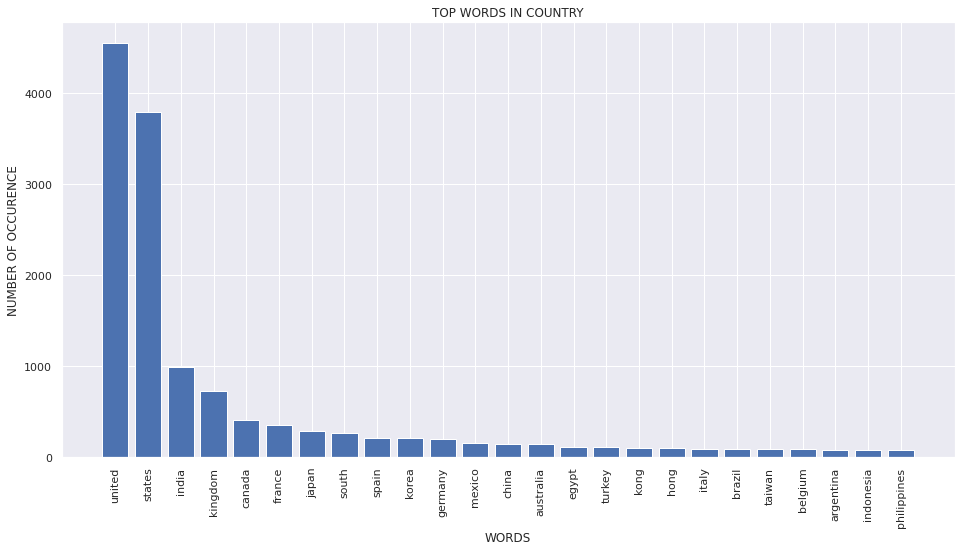

In [ ]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=25,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=reindexed_data)

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('TOP WORDS IN COUNTRY')
ax.set_xlabel('WORDS')
ax.set_ylabel('NUMBER OF OCCURENCE')
plt.show()

<B> WORD CLOUD GENRE </B>is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud. Word clouds are widely used for analyzing data from social network websites.

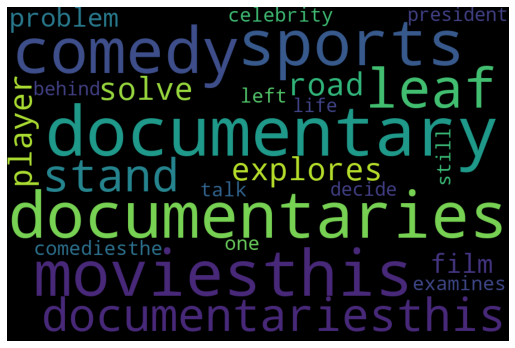

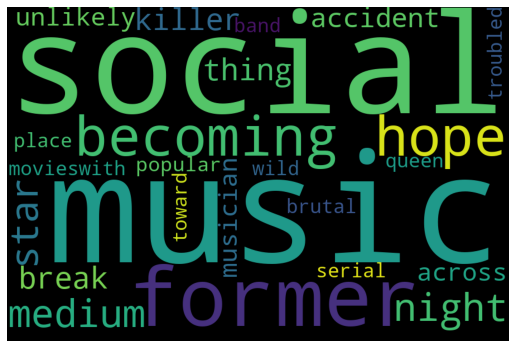

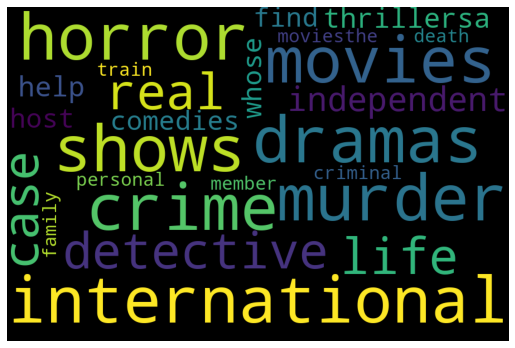

In [ ]:
from wordcloud import WordCloud
# Generate a word cloud image for given topic
def draw_word_cloud(index):
  imp_words_topic=""
  comp=lda_model.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:25]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]
  
  wordcloud = WordCloud(width=900, height=600).generate(imp_words_topic)
  plt.subplots(figsize=(10,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()
# topic 0
draw_word_cloud(4)
draw_word_cloud(3)
draw_word_cloud(7)

WORD CLOUD FOR COUNTRIES & CAST WITH THE MOST CONTENT AVAILABLE


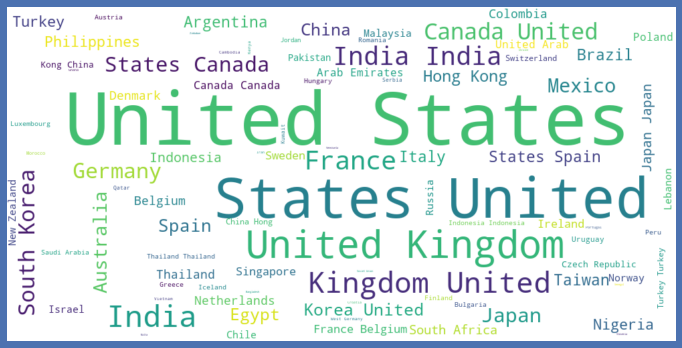

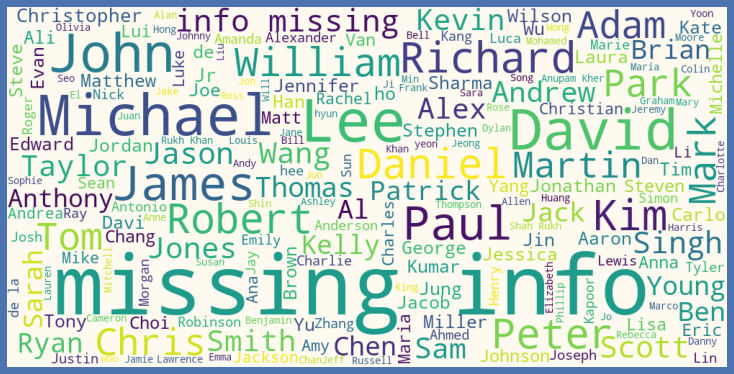

In [ ]:
fig = plt.figure(figsize=(10,5),facecolor = 'b',edgecolor = 'r')
wordcloud = WordCloud(background_color='White',width=1000, height=500 ).generate(" ".join(Flix_df.country))
plt.imshow(wordcloud,interpolation ='bilinear')
plt.axis('off')
plt.tight_layout()
plt.savefig('country.png')
plt.show()
print("\n")

text = Flix_df['cast']
wordcloud = WordCloud(width = 1000,height = 500,background_color = 'floralwhite').generate(" ".join(Flix_df.cast))
fig = plt.figure(figsize = (10, 5),facecolor = 'b',edgecolor = 'k',)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

NETFLIX CONTENT FOR DIFFERENT AGE GROUPS IN TOP 10 COUNTRIES

In [ ]:
Flix_df['principal_country'] = Flix_df['country'].apply(lambda x: x.split(",")[0])
Flix_df['principal_country'].head()

country_order = Flix_df['principal_country'].value_counts()[:11].index
content_data = Flix_df[['type', 'principal_country']].groupby('principal_country')['type'].value_counts().unstack().loc[country_order]
content_data['sum'] = content_data.sum(axis=1)
content_data_ratio = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]

In [ ]:
# Creating new column for age rating
rating_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Young Adults',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
Flix_df['age_rating'] = Flix_df['rating'].replace(rating_ages)
Flix_df['age_rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

CORRELATION HEATMAP

In [ ]:
Flix_df['count'] = 1
data = Flix_df.groupby('principal_country')[['principal_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['principal_country']

Flix_df_heatmap = Flix_df.loc[Flix_df['principal_country'].isin(data)]
Flix_df_heatmap = pd.crosstab(Flix_df_heatmap['principal_country'], Flix_df_heatmap['age_rating'],normalize = "index").T
Flix_df_heatmap

principal_country,Australia,Canada,France,India,Japan,Mexico,South Korea,Spain,United Kingdom,United States
age_rating,,,,,,,,,,
Adults,0.495327,0.467181,0.627551,0.259414,0.368644,0.764228,0.463918,0.797619,0.526042,0.463790
Kids,0.130841,0.150579,0.086735,0.015690,0.008475,0.016260,0.046392,0.035714,0.078125,0.088974
Older Kids,0.214953,0.220077,0.112245,0.163180,0.275424,0.089431,0.123711,0.053571,0.184028,0.201892
Teens,0.028037,0.027027,0.030612,0.004184,0.012712,0.016260,0.000000,0.017857,0.071181,0.084540
Young Adults,0.130841,0.135135,0.142857,0.557531,0.334746,0.113821,0.365979,0.095238,0.140625,0.160804


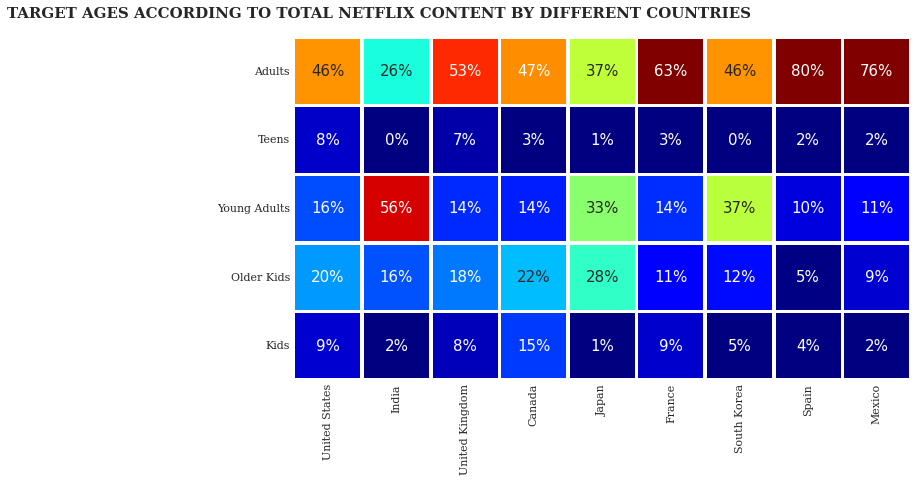

In [ ]:
# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico']

age_order = ['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids']

sns.heatmap(Flix_df_heatmap.loc[age_order,country_order2],cmap="jet",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='2.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":15})

ax.spines['top'].set_visible(True)

fig.text(.76,.765, 'TARGET AGES ACCORDING TO TOTAL NETFLIX CONTENT BY DIFFERENT COUNTRIES', fontweight='bold', fontfamily='serif', fontsize=15,ha='right')   

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()

<B> OBSERVATION : </B> 

See culturally comparable nations - the US and UK are closely aligned with their Netflix target ages, but radically different from, example, India or Japan!

Also, Mexico and Spain have similar content on Netflix for different age groups.

<B> <h2> CLUSTER </h2> </B>

In [ ]:
# transform the data using StandardScaler
Flix_df_standarized = pd.DataFrame(StandardScaler().fit_transform(new_flix_df),columns = new_flix_df.columns)

#Perform a PCA to visualize clusters
pca = PCA(n_components = 2)
Flix_df_pca=pd.DataFrame(pca.fit_transform(Flix_df_standarized))

In [ ]:
Flix_df_standarized.head()

,type,country,release_year,rating,duration,listed_in,year_added,month_added
0,1.496802,-2.041651,0.692231,0.492155,-1.280313,1.084506,1.085420,0.338631
1,-0.668091,-0.505346,0.235617,0.492155,0.467228,0.381066,-1.796311,1.452410
2,-0.668091,-0.099853,-0.335151,-1.052434,0.172698,0.588901,-0.355446,1.452410
3,-0.668091,0.871046,-0.563458,-1.567297,0.211969,-1.713266,-1.075878,1.173965
4,-0.668091,0.871046,-0.677611,-1.567297,1.056286,0.253168,1.085420,-1.610483


<U> CLUSTER MODEL IMPLEMENTATION :</U>
1. AFFINITY PROPAGATION : Recursively merges the pair of clusters that minimally increases a given linkage distance.
2. AGGLOMERATIVE CLUSTERING : Recursively merges pair of clusters of sample data & uses linkage distance.
3. K-MEANS CLUSTERING : an unsupervised machine learning technique used to identify clusters of data objects in a dataset.


1. AFFINITY PROPAGATION

<B> SILHOUETTE SCORE / COFFICIENT</B> is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other.

<b> PRINIPAL COMPONENT ANALYSIS (PCA) </b> is basically a non-dependent procedure in which it reduces attribute space from a large number of variables to a smaller number of factors. It's dimension reduction process but there is no guarantee that the dimension is interpretable.

<I><U>Main task : To select a subset of variables from a larger set, based on which original variables have the highest correlation with the principal amount.</U></I>

In [ ]:
# Using euclidean distance as affinity estimator
af = AffinityPropagation(preference = -753, damping = 0.60, verbose = True, random_state = 0).fit(Flix_df_standarized)
# Using euclidean distance
# af = AffinityPropagation(damping=0.97,affinity='euclidean',verbose=True).fit(netflix) 
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
n_clusters_ = len(cluster_centers_indices)
print('Estimated number of clusters: %d' % n_clusters_)
print('Silhouette Coefficient: %0.3f' % metrics.silhouette_score(Flix_df_standarized, labels, metric = 'sqeuclidean'))

Converged after 81 iterations.
Estimated number of clusters: 13
Silhouette Coefficient: 0.244


Silhouette Coefficient: 0.244


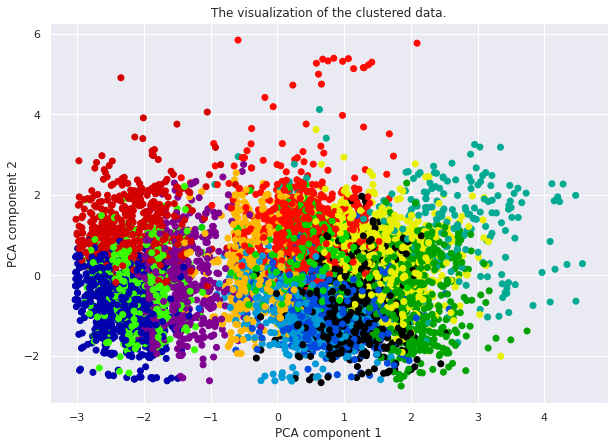

In [ ]:
colors = cm.nipy_spectral(labels.astype(float) / n_clusters_)
#ax = plt.gca()
fig_dims = (10,7)
fig, ax = plt.subplots(figsize = fig_dims) 
plt.scatter(Flix_df_pca[0], Flix_df_pca[1], c = colors)
ax.set_title('The visualization of the clustered data.')
ax.set_xlabel('PCA component 1')
ax.set_ylabel('PCA component 2');

print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(Flix_df_standarized, labels, metric='sqeuclidean'))

<B> OBSERVATION : </B>
Silhouette Coefficient score is 0.244 which is not that well. 
So, we will try some diffrent clustering models.

2. AGGLOMERATIVE CLUSTERING

In [ ]:
# lets start with programimg
def silhouette_analysis(X, X_pca, range_n_clusters):
    
    for n_clusters in range_n_clusters:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 10)

        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        clusterer = AgglomerativeClustering(n_clusters = n_clusters,
                                   affinity = 'euclidean',
                                   linkage = 'ward')
        cluster_labels = clusterer.fit_predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels)
        print('For n_clusters =', n_clusters,
              'The average silhouette_score is :', silhouette_avg)

        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 15
        for i in range(n_clusters):
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            ax1.text(-0.5, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10
        ax1.set_title('The silhouette plot for the various clusters.')
        ax1.set_xlabel('The silhouette coefficient values')
        ax1.set_ylabel('Clusters')

        ax1.axvline(x=silhouette_avg, color = 'Green', linestyle= '--')

        ax1.set_yticks([])  
        ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X_pca[0], X_pca[1], c=colors)
    
        ax2.set_title('The visualization of the clustered data.')
        ax2.set_xlabel('PCA component 1')
        ax2.set_ylabel('PCA component 2')

        plt.suptitle(('\nSilhouette analysis for Agglomerative clustering '
                      'with n_clusters = %d' % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()

For n_clusters = 4 The average silhouette_score is : 0.17296314851287742


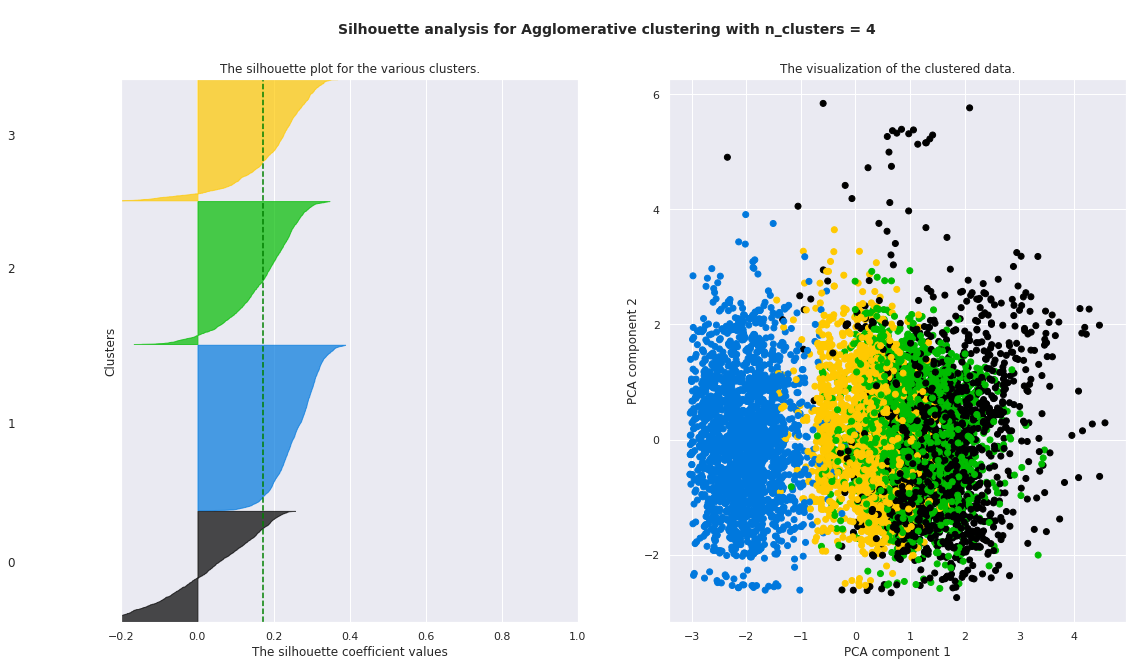

In [ ]:
# Number of Cluster = 4
silhouette_analysis(np.array(Flix_df_standarized),Flix_df_pca,[4])

<B> OBSERVATION : </B> 
Silhouette Coefficient score is 0.172 which is not that well. 
So, we will try some diffrent clustering models.

3. K-MEANS CLUSTERING

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


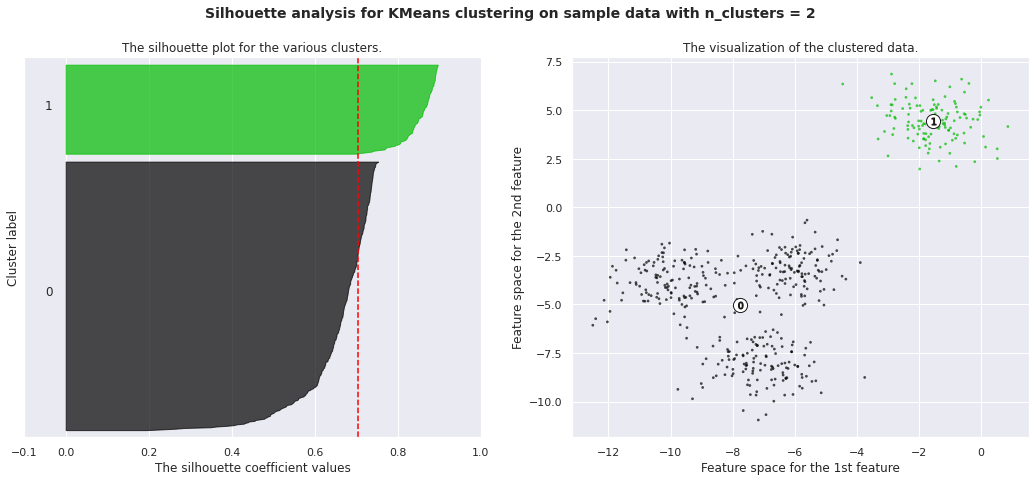

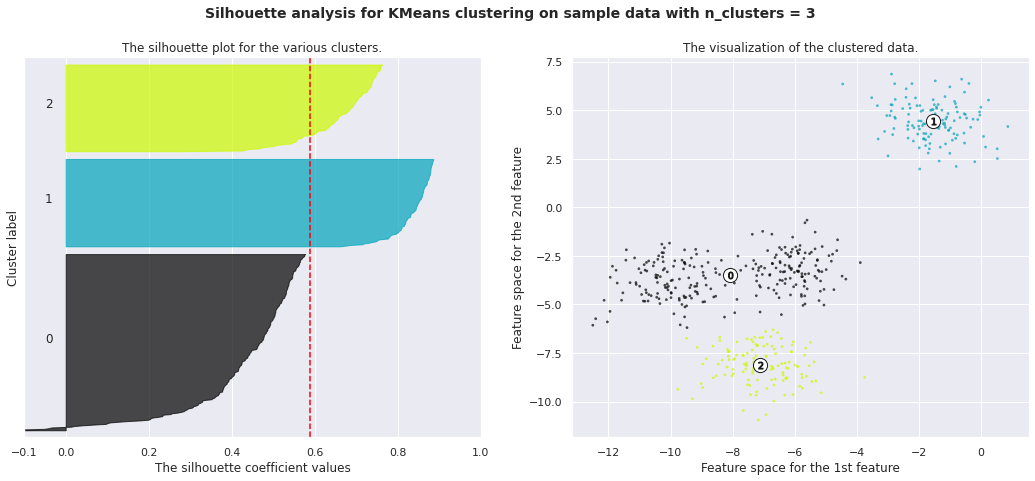

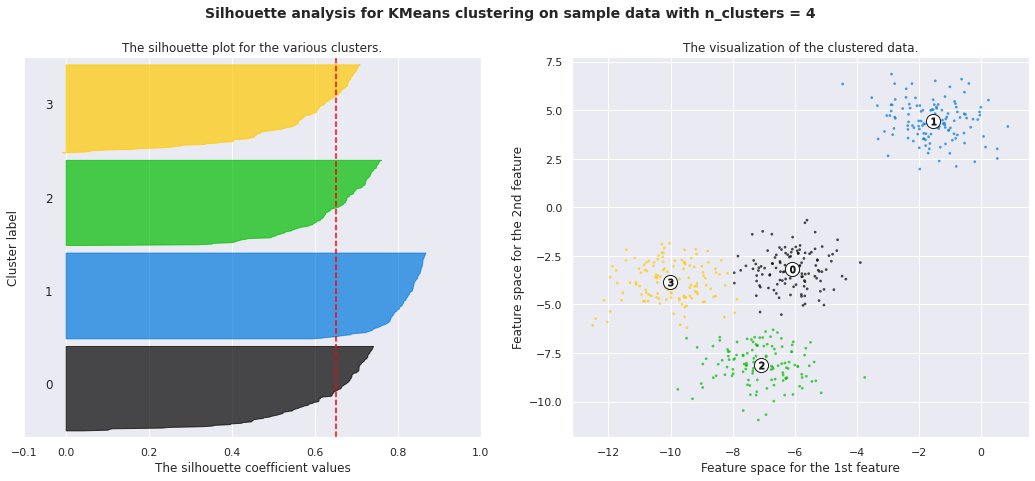

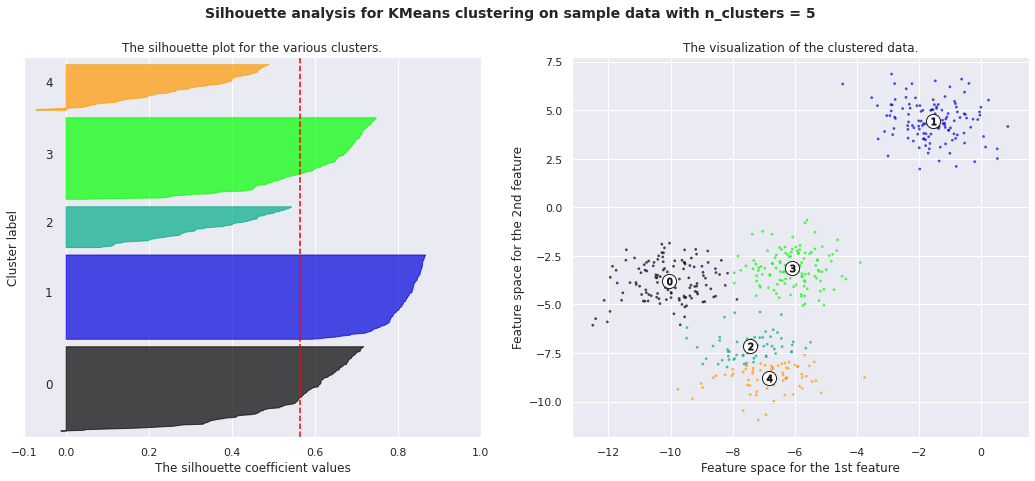

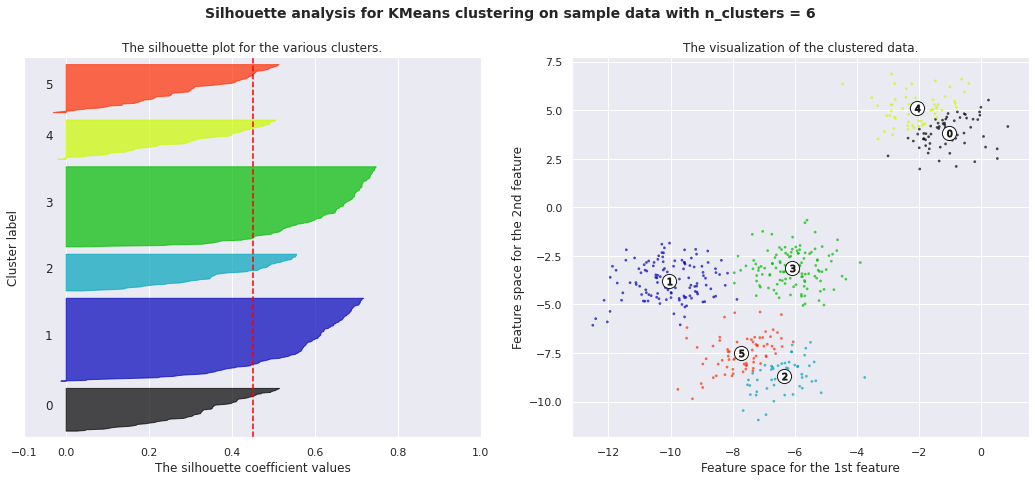

In [ ]:
# Generating the sample data from make_blobs
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)              #  For reproducibility

range_n_clusters = [2, 3, 4, 5,6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

<B> OBSERVATION : </B> For n_clusters = 4, all the plots are more or less of similar thickness and similar sizes. It can be considered as best ‘k’.

In k-means clustering, which consisted of 2,3,4,5,6 clusters. Score of silhoutte in k-measn clustering :

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262

For n_clusters = 3 The average silhouette_score is : 0.5882004012129721

For n_clusters = 4 The average silhouette_score is : 0.6505186632729437

For n_clusters = 5 The average silhouette_score is : 0.56376469026194

For n_clusters = 6 The average silhouette_score is : 0.4504666294372765

<I> Silhouette analysis is also used to find the outliers if present in a cluster.</I>

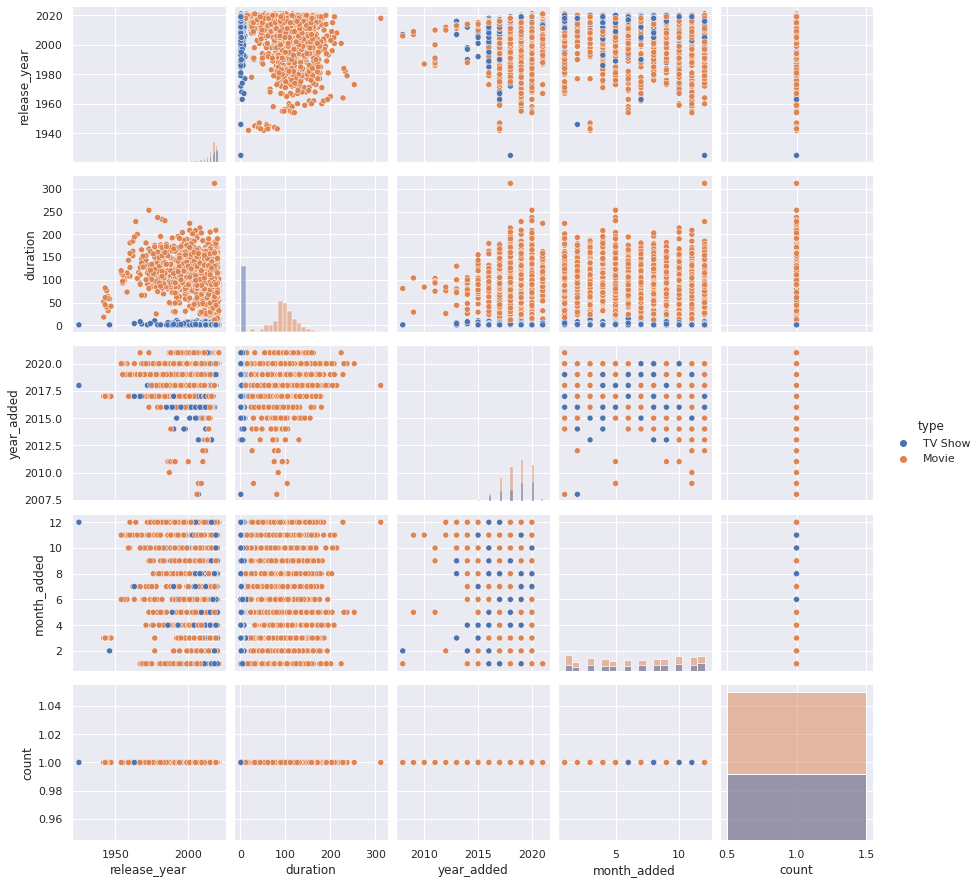

In [ ]:
# MODEL INTERPRETATION
# We try to gain new knowledge using the previous clustering
sns_plot=sns.pairplot(Flix_df, hue="type", diag_kind="hist") #All features against each other
kmeans = KMeans(n_clusters = 4,random_state=42)
kmeans.fit(Flix_df_standarized)
Flix_df['cluster'] = kmeans.labels_

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sc = scaler.fit_transform(new_flix_df)
Netflix = pd.DataFrame(sc, columns=list(new_flix_df.columns))
X = Netflix
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(Netflix).score(Netflix) for i in range(len(kmeans))]

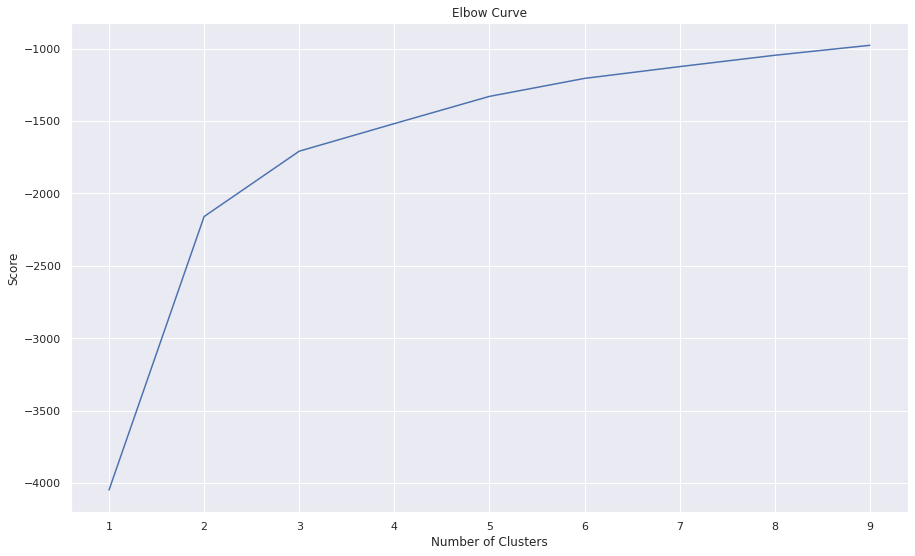

In [ ]:
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [ ]:
#fitting
kmeans = KMeans(n_clusters=5)
kmeans.fit(Netflix)

KMeans(n_clusters=5)

In [ ]:
len(kmeans.labels_)
Netflix['cluster'] = kmeans.labels_
netflix.head()

,type,title,director,cast,country,rating,listed_in,description
0,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,TV-MA,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,R,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,PG-13,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,PG-13,Dramas,A brilliant group of students become card-coun...


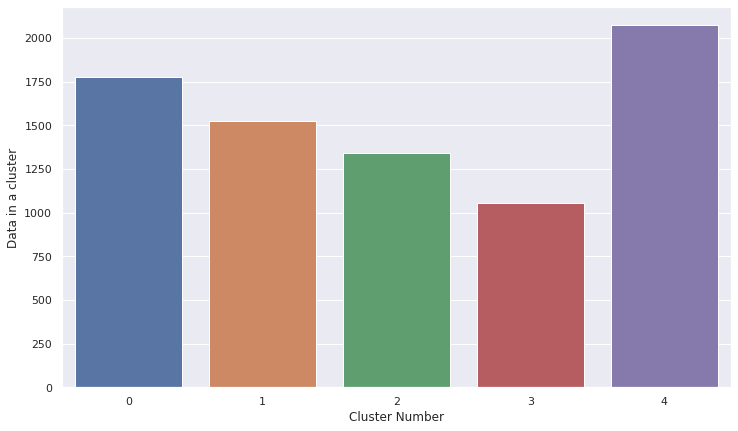

In [ ]:
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,5,1),y=Netflix.groupby(['cluster']).count()['type'].values)
x=axis.set_xlabel("Cluster Number")
x=axis.set_ylabel("Data in a cluster")

<B> OBSERVATION : </B>
Cluster-2 is the largest & Cluster-4 has the fewest no. of movies.

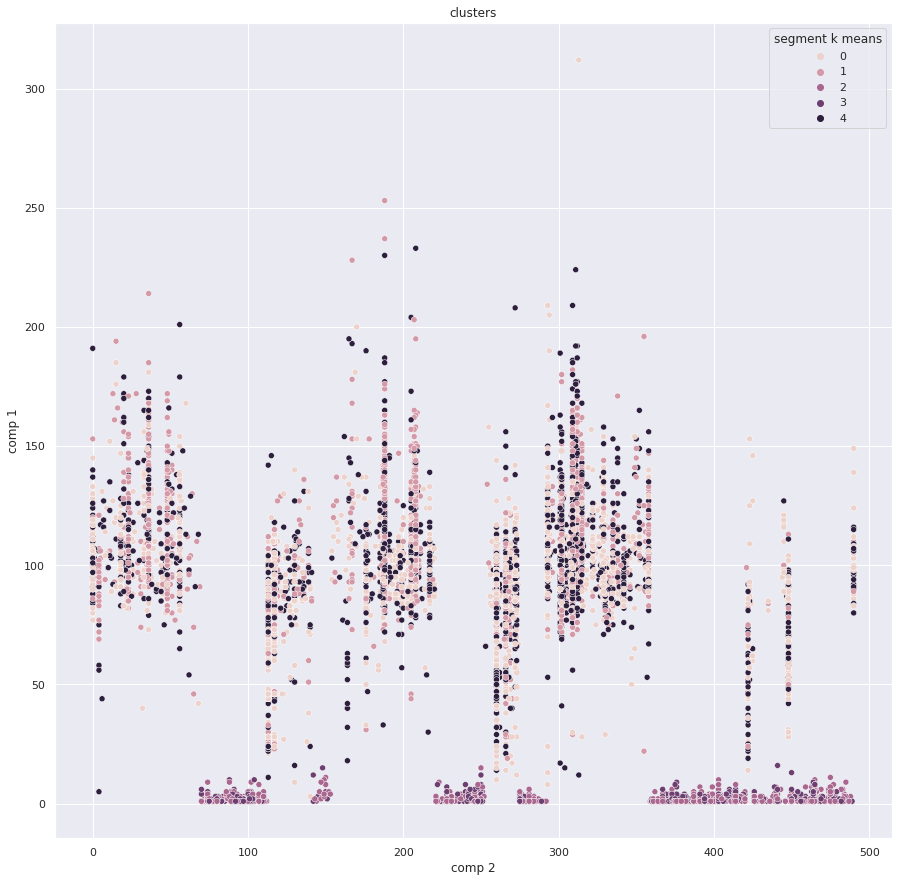

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   type             7777 non-null   int64  
 1   country          7777 non-null   int64  
 2   release_year     7777 non-null   int64  
 3   rating           7777 non-null   int64  
 4   comp 1           7777 non-null   int64  
 5   comp 2           7777 non-null   int64  
 6   comp 3           7777 non-null   int64  
 7   comp 4           7777 non-null   int64  
 8   comp 5           19 non-null     float64
 9   segment k means  7777 non-null   int32  
dtypes: float64(1), int32(1), int64(8)
memory usage: 638.0 KB


In [ ]:
df = pd.concat([new_flix_df,pd.DataFrame(score)],axis=1)
df.columns.values[-5:]=['comp 1','comp 2','comp 3','comp 4','comp 5']
df['segment k means'] = kmeans.labels_

#df = df.set_index(df['show_id'])
#f_mm.head()

x_axis = df['comp 2']
y_axis = df['comp 1']
plt.figure(figsize=(15,15))
sns.scatterplot(x_axis,y_axis,hue=df['segment k means'])
plt.title('clusters')
plt.show()

df.info()

<B> CONCLUSION : </B> 

1. For the clustering algorithm, we utilised type, director, nation, released year, genre, and year.

2. Recommendation system works perfectly well with description column.

3. Silhouette score for a set of sample data points is used to measure how dense and well-separated the clusters are.

4. Applied different clustering models Kmeans, hierarchical, Agglomerative clustering on data we got the best cluster arrangments.